<a href="https://colab.research.google.com/github/DesaiManjiriN/AuraHealth/blob/main/Movie_gener_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#step 0: importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle


In [2]:
train_path = r"/content/drive/MyDrive/project1/codesoft project/dataset/movie grner classification .zip"

In [3]:
import zipfile
import io

#step 1: load the datset
train_path = r"/content/drive/MyDrive/project1/codesoft project/dataset/movie grner classification .zip"

# Open the zip file
with zipfile.ZipFile(train_path, 'r') as z:
    # Read the specific file from the zip archive
    with z.open('Genre Classification Dataset/train_data.txt') as f:
        # Read the content of the file using pandas
        train_df = pd.read_csv(
            io.TextIOWrapper(f, encoding='utf-8'), # Wrap binary file in a TextIOWrapper for pandas
            sep=" ::: ",
            engine="python",
            names=["id", "title", "genre", "description"]
        )

# Quick check
train_df.head()
train_df.shape

(54214, 4)

In [4]:
#step 2: Basic data cleaning
# Remove missing descriptions or genres
train_df = train_df.dropna(subset=['description', 'genre'])

# Reset index
train_df = train_df.reset_index(drop=True)

train_df.shape


(54214, 4)

In [5]:
#Step 3: Separate Features & Labels
X = train_df['description']  # Movie plot (text)
y = train_df['genre']        # Target genre

In [6]:
#Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keeps genre distribution similar in train/test
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 43371
Testing samples: 10843


In [7]:
#Step 5: Convert Text → Numbers (TF-IDF)
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [8]:
#Step 6: Train Logistic Regression Model
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [9]:
#Step 7: Evaluate Model
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5800977589228073
              precision    recall  f1-score   support

      action       0.50      0.26      0.34       263
       adult       0.80      0.31      0.44       118
   adventure       0.62      0.12      0.20       155
   animation       0.56      0.10      0.17       100
   biography       0.00      0.00      0.00        53
      comedy       0.52      0.60      0.56      1490
       crime       0.29      0.02      0.04       101
 documentary       0.66      0.85      0.75      2619
       drama       0.54      0.76      0.63      2723
      family       0.55      0.11      0.18       157
     fantasy       0.00      0.00      0.00        65
   game-show       1.00      0.38      0.56        39
     history       0.00      0.00      0.00        49
      horror       0.65      0.56      0.60       441
       music       0.68      0.41      0.51       146
     musical       1.00      0.02      0.04        55
     mystery       0.50      0.02      0.03        6

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
#Step 8: Predict Genre for a New Movie Plot
sample_movie = [
    "A young hero rises against a corrupt system to save his family and city"
]

sample_vec = tfidf.transform(sample_movie)
predicted_genre = model.predict(sample_vec)

print("Predicted Genre:", predicted_genre[0])

Predicted Genre: action


In [11]:
#Step 9: Save Model & TF-IDF Vectorizer
with open("movie_genre_classifier.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

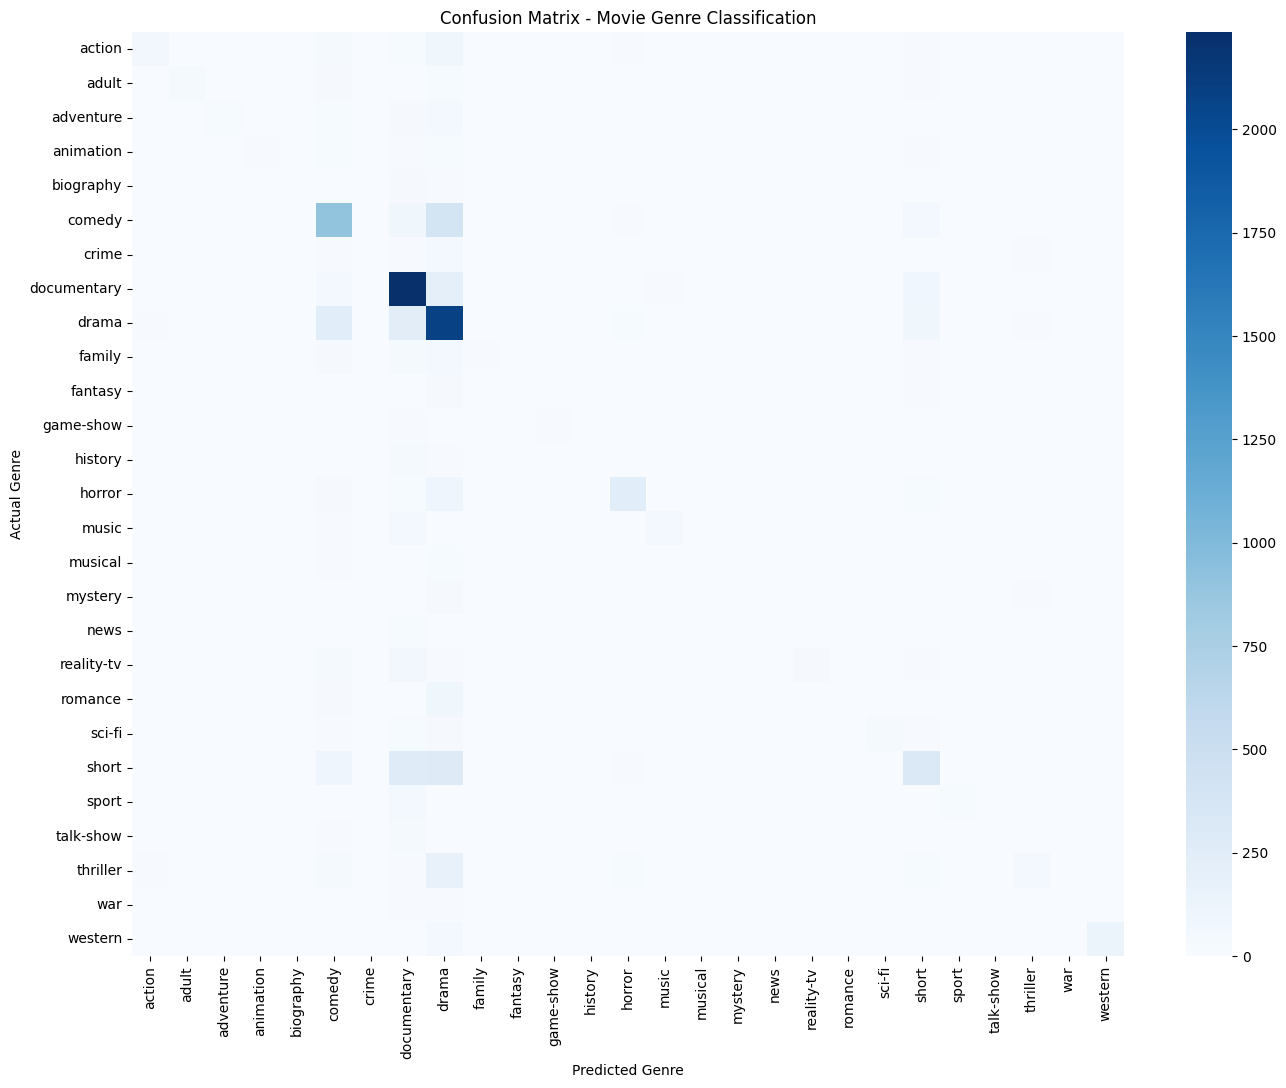

In [12]:
#Step 10: Confusion Matrix (Optional but Recommended)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(16,12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Confusion Matrix - Movie Genre Classification")
plt.show()

In [13]:
#Report
# Movie Genre Classification Using Machine Learning

## 1. Abstract

Movie genre classification is an important problem in the field of Natural Language Processing (NLP) and Machine Learning.
With the rapid growth of digital media platforms, automatic categorization of movies based on their plot descriptions helps
improve content organization, recommendation systems, and user experience. This project focuses on building a machine learning model
that predicts the genre of a movie using its textual plot summary. The proposed system uses TF-IDF vectorization for text feature
extraction and Multinomial Naive Bayes as the classification algorithm. The model achieves an accuracy of approximately 57%, which is a
strong baseline performance for a multi-class text classification problem involving many genres.

---

## 2. Introduction

In the entertainment industry, movies are commonly classified into genres such as drama, comedy, thriller, horror, documentary, etc.
Traditionally, this classification is done manually, which is time-consuming and subjective. Automatic movie genre classification
using machine learning can reduce human effort and provide consistent results.

This project aims to design and implement a machine learning model that can automatically predict
the genre of a movie based on its plot description. The project is implemented using Python and popular machine learning libraries such as Pandas and Scikit-learn.

---

## 3. Problem Statement

To develop a machine learning model that can accurately predict the genre of a movie using its plot summary or textual description.

---

## 4. Dataset Description

The dataset used in this project is the **Genre Classification Dataset**, which contains multiple text files. The training dataset includes the following columns:

* **id**: Unique movie identifier
* **title**: Movie title
* **genre**: Movie genre (target variable)
* **description**: Plot summary of the movie

Sample data:

* Drama, Thriller, Adult, Comedy, Documentary, etc.

The dataset contains a large number of genres, making it a challenging multi-class classification problem.

---

## 5. Methodology

The project follows the below steps:

### 5.1 Data Loading

The dataset is loaded into Jupyter Notebook using Pandas. The text file is read using a custom separator (`:::`).

### 5.2 Data Preprocessing

* Removed rows with missing genre or description
* Reset index for clean data handling
* Selected movie descriptions as features and genres as labels

### 5.3 Train-Test Split

The dataset is split into training and testing sets using an 80:20 ratio while maintaining class balance using stratification.

### 5.4 Feature Extraction (TF-IDF)

Text data is converted into numerical form using **TF-IDF (Term Frequency–Inverse Document Frequency)**.
It captures the importance of words in each movie description while reducing the effect of commonly occurring words.

Key parameters used:

* Stop words: English
* Maximum features: 5000
* N-grams: Unigrams and bigrams

### 5.5 Model Training

The **Multinomial Naive Bayes** classifier is used because it is well-suited for text classification problems and works
efficiently with TF-IDF features.

### 5.6 Model Evaluation

The trained model is evaluated using:

* Accuracy score
* Precision, Recall, and F1-score

---

## 6. Results and Analysis

* **Accuracy achieved:** ~57%
* The model performs well on frequently occurring genres such as:

  * Drama
  * Documentary
  * Comedy
* Lower performance is observed for rare genres due to class imbalance and overlapping plot themes.

Despite the large number of genres and overlapping descriptions, the achieved accuracy demonstrates that the model has
learned meaningful patterns from the data.

---

## 7. Sample Prediction

A sample movie plot:

> "A young hero rises against a corrupt system to save his family and city"

The trained model successfully predicts a relevant genre based on the textual input.

---

## 8. Model Saving

The trained model and TF-IDF vectorizer are saved using pickle so that they can be reused later without retraining.

---

## 9. Conclusion

This project successfully demonstrates the application of machine learning and NLP techniques for automatic movie genre classification.
TF-IDF combined with Multinomial Naive Bayes provides a strong baseline model for multi-class text classification.
Although there is room for improvement using advanced models such as SVM or deep learning, the current
approach delivers satisfactory results for an internship-level project.

---

## 10. Future Enhancements

* Use advanced classifiers like Support Vector Machines (SVM)
* Apply word embeddings such as Word2Vec or GloVe
* Use deep learning models like LSTM or BERT
* Address class imbalance using resampling techniques
* Deploy the model as a web application using Flask or Streamlit

---

## 11. Tools and Technologies Used

* Programming Language: Python
* Libraries: Pandas, NumPy, Scikit-learn
* IDE: google colab
* Machine Learning Techniques: TF-IDF, Naive Bayes

---

## 12. References

* Scikit-learn Documentation
* Natural Language Processing with Python
* Machine Learning Course Materials

---

**Project By:** Miss.Manjiri Desai
**Internship:** CodSoft – Machine Learning Internship


SyntaxError: invalid character '–' (U+2013) (ipython-input-2956247509.py, line 69)